In [1]:
import missingno.missingno as msno

In [2]:
msno.geoplot

<function missingno.missingno.geoplot>

In [3]:
import pandas as pd
collisions = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv")

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
def m(v):
    if pd.notnull(v):
        return eval(v)
    else:
        return (None, None)
collisions['LOCATION'] = collisions['LOCATION'].map(m)

In [6]:
%matplotlib inline

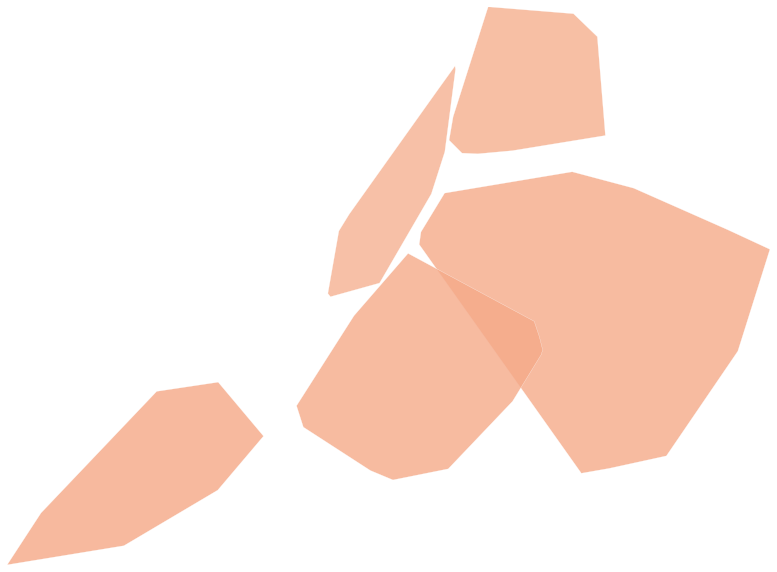

In [10]:
msno.geoplot(collisions.sample(1000), x='LONGITUDE', y='LATITUDE', by='BOROUGH')

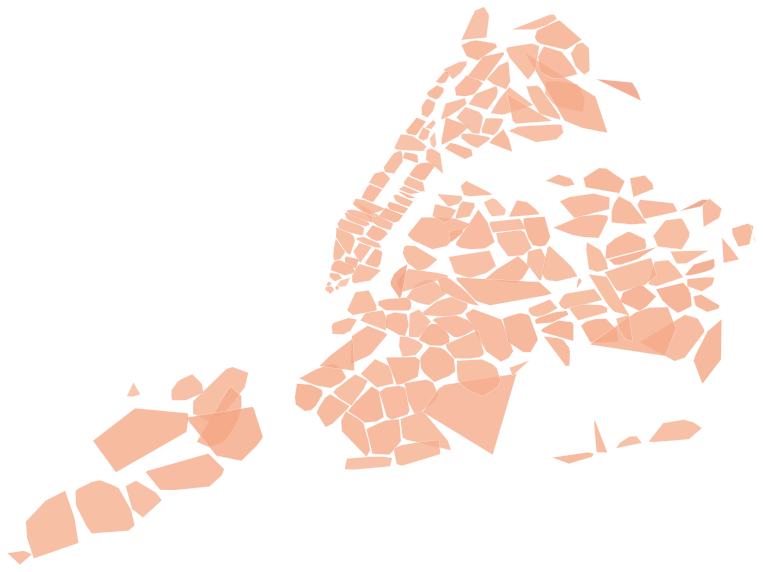

In [44]:
msno.geoplot(collisions.sample(10000), x='LONGITUDE', y='LATITUDE', by='ZIP CODE')

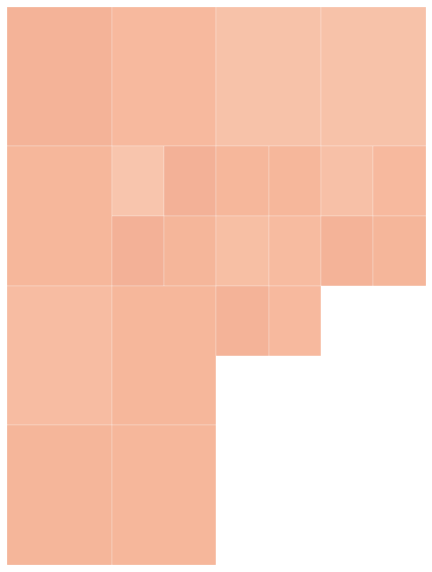

In [46]:
import mplleaflet
msno.geoplot(collisions.sample(1000), coordinates='LOCATION')

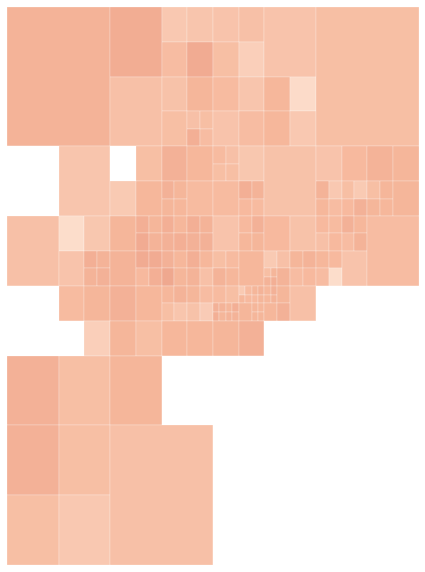

CPU times: user 1min 4s, sys: 394 ms, total: 1min 5s
Wall time: 1min 5s


In [36]:
%time msno.geoplot(collisions.sample(10000), coordinates='LOCATION')

In [2]:
import geopandas as gpd

In [ ]:
boroughs = gpd.read_file("boroughs.geojson", driver='GeoJSON')

In [1]:
%ls

 Volume in drive C is SSD_80GB
 Volume Serial Number is 9279-00B2

 Directory of C:\Users\Alex\Desktop\missingno

10/24/2016  11:20 AM    <DIR>          .
10/24/2016  11:20 AM    <DIR>          ..
04/09/2016  04:19 PM               471 .gitignore
10/24/2016  11:17 AM    <DIR>          .idea
10/23/2016  09:08 PM    <DIR>          .ipynb_checkpoints
10/24/2016  11:04 AM             1,379 _map.html
10/24/2016  11:17 AM         3,077,143 boroughs.txt
10/23/2016  09:06 PM         1,446,147 dev1.ipynb
10/24/2016  11:20 AM           237,866 dev2.ipynb
04/27/2016  12:57 PM    <DIR>          dist
03/27/2016  09:25 PM               101 MANIFEST
10/24/2016  11:12 AM    <DIR>          missingno
03/27/2016  10:30 PM    <DIR>          missingno.egg-info
10/23/2016  12:21 PM       172,993,080 NYPD_Motor_Vehicle_Collisions.csv
10/23/2016  12:13 PM            12,494 README.md
04/27/2016  12:52 PM               688 setup.py
               9 File(s)    177,769,369 bytes
               7 Dir(s)   6,199,18

In [ ]:
# %time msno.geoplot(collisions.sample(100000), coordinates='LOCATION')